In [1]:
import scanpy as sc
import scprep
import pandas as pd
import phate
import anndata

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/pyg/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_a23 = sc.read_h5ad("../data/A23-290-CP_anndata.h5ad")

In [3]:
# sc.pp.recipe_zheng17(data_a23)
sc.pp.filter_genes(data_a23, min_counts=1)         # only consider genes with more than 1 count
# sc.pp.normalize_per_cell(                       # normalize with total UMI count per cell
#      data_a23, key_n_counts='n_counts_all'
# )
# sc.pp.log1p(data_a23)

<Axes: xlabel='Library size', ylabel='Number of cells'>

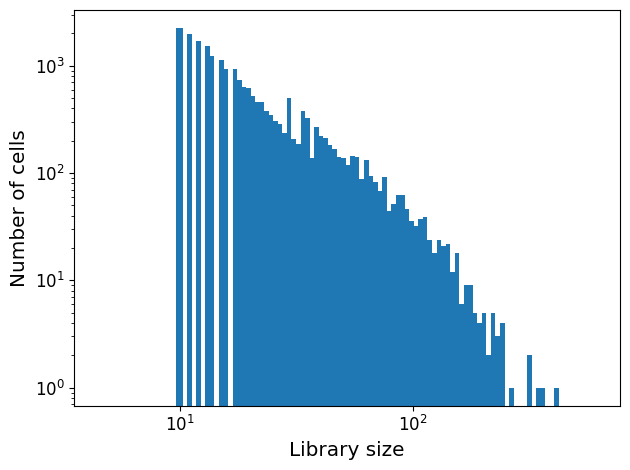

In [4]:
scprep.plot.plot_library_size(data_a23.X)

In [5]:
phate_operator = phate.PHATE()
X_phate = phate_operator.fit_transform(data_a23.X.toarray())
data_a23.obsm['X_phate'] = X_phate

Calculating PHATE...
  Running PHATE on 21331 observations and 15936 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 42.92 seconds.
    Calculating KNN search...
    Calculated KNN search in 115.16 seconds.
    Calculating affinities...
    Calculated affinities in 20.34 seconds.
  Calculated graph and diffusion operator in 178.50 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 3.27 seconds.
    Calculating KMeans...
    Calculated KMeans in 8.09 seconds.
  Calculated landmark operator in 12.72 seconds.
  Calculating optimal t...
    Automatically selected t = 21
  Calculated optimal t in 6.89 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 2.32 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 9.47 seconds.
Calculated PHATE in 209.94 seconds.


<Axes: title={'center': 'A23-290-CP'}, xlabel='PHATE 1', ylabel='PHATE 2'>

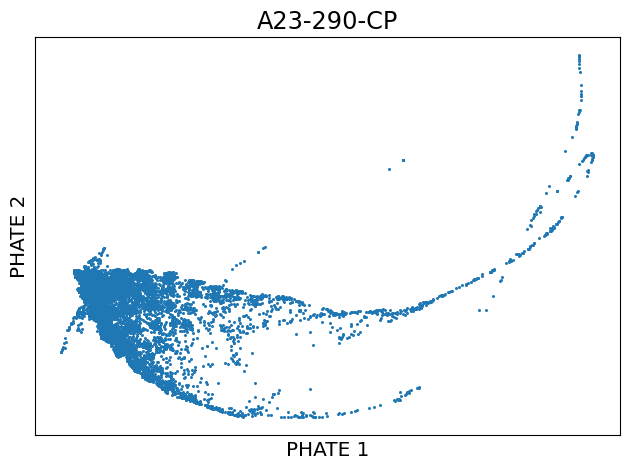

In [6]:
scprep.plot.scatter2d(data_a23.obsm['X_phate'], ticks=False, label_prefix='PHATE ', title='A23-290-CP')

In [7]:
data_a23.write_h5ad("../data/A23-290-CP_preprocessed_gentle.h5ad")